The cell below removes the annoying app bar thing at the bottom of a notebook.

In [1]:
%%javascript
$('.nbp-app-bar').toggle()

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
#import pysal as ps
#import scipy as sp
#from sqlalchemy import *
#from pysal.contrib.viz import mapping as maps
#import rasterio
#import psycopg2
#from geoalchemy2 import Geometry, WKTElement
#from osgeo import gdal
import sqlite3
import seaborn as sns
from sklearn.linear_model import LogisticRegression


%matplotlib inline

The cell below makes it so pandas will show me all the columns.

In [3]:
pd.set_option('display.max_columns', 40)

The below cell loads the spatialite extention to sqlite. I got the code from the spatialite mailing list
https://groups.google.com/d/msg/spatialite-users/o0jUwMUqx_g/OEat2JTUAAAJ
I can get it to work without geopandas. With geopandas imported it kills the ipython kernel within seconds. Ironic! Without one, the other is useless.

In [ ]:
#conn = sqlite3.connect(':memory:') 
#conn.enable_load_extension(True) 
#conn.execute("SELECT load_extension('mod_spatialite')") 

The below code for importing all the sql data came from: https://www.dataquest.io/blog/python-pandas-databases/

In [4]:
conn = sqlite3.connect("./data/FPA_FOD_20170508.sqlite")

In [ ]:
#this is if you want to read the data in as tuples

#cur = conn.cursor()
#cur.execute("SELECT * FROM fires;")
#results = cur.fetchall()

In [ ]:
df_all = pd.read_sql_query("SELECT * FROM fires;", conn)
#this grabs the whole db and puts it into a df using the sqlite3.Connection

In [ ]:
# gdf_all = gpd.GeoDataFrame(pd.read_sql_query("SELECT * FROM fires;", conn), geometry='Shape')

#Just because you don't think something will work doesn't mean you shouldn't give it a try.

In [6]:
df_all.shape

(1880465, 39)

In [7]:
df_all.head(2)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...


Since pandas can't handle the geometry information the Shape column is useless anyway, I'm going to drop it. It lives on in the original sqlite db.

In [74]:
df_all.drop(['Shape'], axis=1, inplace=True)

In [14]:
df_all.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [8]:
df_all.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_FIRE_REPORT_ID           object
LOCAL_INCIDENT_ID              object
FIRE_CODE                      object
FIRE_NAME                      object
ICS_209_INCIDENT_NUMBER        object
ICS_209_NAME                   object
MTBS_ID                        object
MTBS_FIRE_NAME                 object
COMPLEX_NAME                   object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                 object
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY    

In [9]:
df_all.isnull().sum()

OBJECTID                            0
FOD_ID                              0
FPA_ID                              0
SOURCE_SYSTEM_TYPE                  0
SOURCE_SYSTEM                       0
NWCG_REPORTING_AGENCY               0
NWCG_REPORTING_UNIT_ID              0
NWCG_REPORTING_UNIT_NAME            0
SOURCE_REPORTING_UNIT               0
SOURCE_REPORTING_UNIT_NAME          0
LOCAL_FIRE_REPORT_ID          1459286
LOCAL_INCIDENT_ID              820821
FIRE_CODE                     1555636
FIRE_NAME                      957189
ICS_209_INCIDENT_NUMBER       1854748
ICS_209_NAME                  1854748
MTBS_ID                       1869462
MTBS_FIRE_NAME                1869462
COMPLEX_NAME                  1875282
FIRE_YEAR                           0
DISCOVERY_DATE                      0
DISCOVERY_DOY                       0
DISCOVERY_TIME                 882638
STAT_CAUSE_CODE                     0
STAT_CAUSE_DESCR                    0
CONT_DATE                      891531
CONT_DOY    

In [10]:
mtbs_perims = './data/mtbs_perimeter_data_v2/dissolve_mtbs_perims_1984-2015_DD_20170501.shp'

In [11]:
d_perims = gpd.read_file(mtbs_perims)

In [12]:
d_perims.shape

(20340, 8)

In [13]:
d_perims.tail(5)

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,FireType,Acres,geometry
20335,WY4491210990219880711,CLOVER,1988,7,11,WFU,354075,(POLYGON ((-109.9723913732363 44.9684334236698...
20336,WY4494010617520020806,CABIN CRK,2002,8,6,WF,1603,POLYGON ((-106.1666367970759 44.95435714445144...
20337,WY4495310930920110821,HOLEINTHEWALL,2011,8,21,WF,6559,"POLYGON ((-109.296202898266 45.04187553483545,..."
20338,WY4497710769520030809,LITTLE HORN II,2003,8,9,WF,5754,"POLYGON ((-107.69927425079 45.00493528530708, ..."
20339,WY4499610614320120921,BORDER,2012,9,21,WF,5428,"POLYGON ((-106.111876069769 44.96377468433439,..."


Some of the FPA_FOD data comes from the MTBS data set, which I have. The MTBS set has information on the fires it contains lacking in the FPA_FOD data. The MTBS set is much smaller but there are many missing values from the MTBS columns in the FPA_FOD data set that should have entries in them. I'm going to import the MTBS data set and check if any variables in both sets can match individual fires with the corresponding entry in the other set. This way I can add the extra features in the MTBS set to this one where appropriate.

In [19]:
#df_all[df_all['FPA_ID'].str.contains("WY4499")] #I tried about 10 different codes with no luck. This is a bust.

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape


I'm going to create a new df, df_pred, by dropping columns from the FPA_FOD data. I'm going to read that into a csv so I have it for later, and then stop using the full set. I will keep the full set on my SSD, of course. I am making these decisions based on the data atlas located here: https://www.kaggle.com/davideanastasia/contour-map-of-us-wildfire-dataset/data

In [52]:
df_all['FIRE_CODE'].value_counts()

D44Z    9451
5555    5144
D5GJ    3459
0001    3329
0000    1928
2300    1892
EKV3    1032
4700    1003
EKW0     938
0100     904
EKT5     883
5900     833
EKV0     756
EK2R     729
7000     721
EKV5     703
EK2D     690
EK3D     666
EK2N     660
EKV6     647
EK2A     624
EKT4     614
EK2B     585
EK2Q     551
7500     537
EN0A     534
EK2F     513
EKW2     504
EKS5     495
EKT1     493
        ... 
GZ33       1
F6CP       1
E1WL       1
JV0N       1
G2HS       1
DC7J       1
A6EW       1
A0L8       1
JK13       1
B8VG       1
A4YU       1
GN62       1
HQ2V       1
F1JP       1
DWX0       1
DAC3       1
G87E       1
FV0X       1
C7MC       1
D00P       1
G6WZ       1
DA35       1
CT61       1
E2FF       1
GZK6       1
CKD9       1
C9AX       1
D4G9       1
B2YF       1
B606       1
Name: FIRE_CODE, Length: 172446, dtype: int64

In [57]:
df_pred = df_all.drop(['OBJECTID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
                  'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
                  'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
                  'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
                  'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
                  'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
                  'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_TIME', 
                  'STAT_CAUSE_CODE', 'CONT_DATE', 'CONT_TIME', 
                  'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 
                  'OWNER_DESCR', 'COUNTY', 'FIPS_NAME', 'Shape'], axis=1)

In [58]:
df_pred.shape

(1880465, 7)

In [59]:
df_pred.head(3)

,FOD_ID,DISCOVERY_DOY,STAT_CAUSE_DESCR,CONT_DOY,FIRE_SIZE,STATE,FIPS_CODE
0,1,33,Miscellaneous,33.0,0.10,CA,063
1,2,133,Lightning,133.0,0.25,CA,061
2,3,152,Debris Burning,152.0,0.10,CA,017


I am going to engineer some features. Time of burn from discovered to contained.

In [62]:
df_pred['NUM_DAYS'] = df_pred['CONT_DOY'] - df_pred['DISCOVERY_DOY']

In [63]:
df_pred.head(3)

,FOD_ID,DISCOVERY_DOY,STAT_CAUSE_DESCR,CONT_DOY,FIRE_SIZE,STATE,FIPS_CODE,NUM_DAYS
0,1,33,Miscellaneous,33.0,0.10,CA,063,0.0
1,2,133,Lightning,133.0,0.25,CA,061,0.0
2,3,152,Debris Burning,152.0,0.10,CA,017,0.0


In [66]:
df_pred.NUM_DAYS.value_counts()

 0.0      806263
 1.0      104940
 2.0       24467
 3.0       11638
 4.0        6771
 5.0        4671
 6.0        3439
 7.0        2870
 8.0        2046
 9.0        1689
 10.0       1565
 11.0       1246
 12.0       1009
 13.0        846
 14.0        746
 15.0        716
 17.0        593
 16.0        576
 18.0        513
 19.0        443
 20.0        433
 21.0        393
 31.0        362
 22.0        361
 23.0        323
 27.0        283
 25.0        282
 24.0        280
 26.0        278
 28.0        262
           ...  
-36.0          1
-136.0         1
 180.0         1
-138.0         1
-53.0          1
-153.0         1
-204.0         1
-210.0         1
 240.0         1
-226.0         1
-22.0          1
 231.0         1
 232.0         1
 242.0         1
-61.0          1
 241.0         1
-242.0         1
 245.0         1
 248.0         1
 364.0         1
-19.0          1
 254.0         1
 255.0         1
 264.0         1
 265.0         1
 266.0         1
 268.0         1
 270.0        

Oh. There are fires that happened in one year and then ended in the previous year. The 2 columns with the actual dates for discovery and containment are in the Julian format so I will have to convert them into gregorian timestamps and then engineer a duration. I do think day of year discovered will have some predictive power and will keep that column.

In [67]:
from datetime import datetime

In [69]:
df_all['START_DATE'] = pd.to_datetime(df_all['DISCOVERY_DATE'], unit='D', infer_datetime_format=True, origin='julian')

In [71]:
df_all['END_DATE'] = pd.to_datetime(df_all['CONT_DATE'], unit='D', infer_datetime_format=True, origin='julian')

In [72]:
df_all.head(2)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,...,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape,START_DATE,END_DATE
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,...,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...,2005-02-02,2005-02-02
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,...,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...,2004-05-12,2004-05-12


In [73]:
df_all.drop(['DISCOVERY_DATE', 'CONT_DATE'], axis=1, inplace=True)

In [79]:
df_all['BURN_TIME'] = (df_all['END_DATE'] - df_all['START_DATE']).astype('timedelta64[D]')

In [80]:
df_all.head(2)

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,START_DATE,END_DATE,BURN_TIME
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,33,1300,9.0,Miscellaneous,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,2005-02-02,2005-02-02,0.0
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,133,0845,1.0,Lightning,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,2004-05-12,2004-05-12,0.0


In [84]:
df_all.END_DATE.isnull().sum()

891531

In [87]:
df_all['BURN_TIME'].isnull().sum()

891531

In [123]:
df_all.loc[df_all['BURN_TIME'].isnull()].count()

OBJECTID                      891531
FOD_ID                        891531
FPA_ID                        891531
SOURCE_SYSTEM_TYPE            891531
SOURCE_SYSTEM                 891531
NWCG_REPORTING_AGENCY         891531
NWCG_REPORTING_UNIT_ID        891531
NWCG_REPORTING_UNIT_NAME      891531
SOURCE_REPORTING_UNIT         891531
SOURCE_REPORTING_UNIT_NAME    891531
LOCAL_FIRE_REPORT_ID           11612
LOCAL_INCIDENT_ID             538778
FIRE_CODE                       6002
FIRE_NAME                     240345
ICS_209_INCIDENT_NUMBER         5558
ICS_209_NAME                    5558
MTBS_ID                         2018
MTBS_FIRE_NAME                  2018
COMPLEX_NAME                     667
FIRE_YEAR                     891531
DISCOVERY_DOY                 891531
DISCOVERY_TIME                 86222
STAT_CAUSE_CODE               891531
STAT_CAUSE_DESCR              891531
CONT_DOY                           0
CONT_TIME                        380
FIRE_SIZE                     891531
F

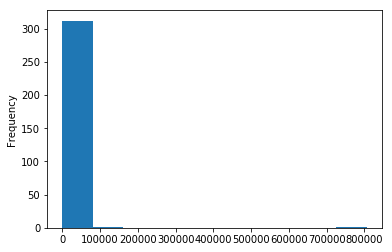

In [104]:
df_all['BURN_TIME'].value_counts().plot(kind='hist')

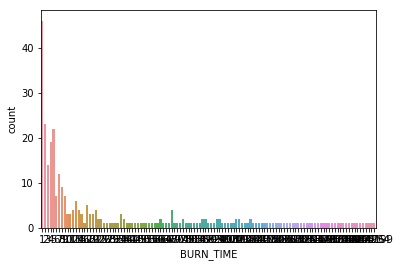

In [112]:
sns.countplot(x=df_all['BURN_TIME'].value_counts(), data=df_all)

In [21]:
df_pred.STAT_CAUSE_DESCR.unique()

array(['Miscellaneous', 'Lightning', 'Debris Burning', 'Campfire',
       'Equipment Use', 'Arson', 'Children', 'Railroad', 'Smoking',
       'Powerline', 'Structure', 'Fireworks', 'Missing/Undefined'],
      dtype=object)

In [19]:
df_pred.dtypes

FOD_ID                int64
DISCOVERY_DOY         int64
STAT_CAUSE_DESCR     object
FIRE_SIZE           float64
LATITUDE            float64
LONGITUDE           float64
STATE                object
FIPS_CODE            object
dtype: object

I'm going to make a new column to use as my target, "Arson". If the cause was arson the value will be 1, else 0.

In [31]:
def make_arson(dataframe):
    if dataframe['STAT_CAUSE_DESCR'] == 'Arson':
        val = 1
    else:
        val = 0
    return val

In [32]:
df_pred['ARSON'] = df_pre.apply(make_arson, axis=1)

In [33]:
df_pred.head()

,FOD_ID,DISCOVERY_DOY,STAT_CAUSE_DESCR,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,FIPS_CODE,ARSON
0,1,33,Miscellaneous,0.10,40.036944,-121.005833,CA,063,0
1,2,133,Lightning,0.25,38.933056,-120.404444,CA,061,0
2,3,152,Debris Burning,0.10,38.984167,-120.735556,CA,017,0
3,4,180,Lightning,0.10,38.559167,-119.913333,CA,003,0
4,5,180,Lightning,0.10,38.559167,-119.933056,CA,003,0


Target column made. Need to import this into geopandas so I can use the lat-long information.

In [56]:
df_pred.ARSON.value_counts()

AttributeError: 'DataFrame' object has no attribute 'ARSON'